In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy 
import scipy.stats

In [123]:
data = pd.read_csv(r"https://raw.githubusercontent.com/bz374/ORIE5147Project/main/Possible%20Features.csv")

In [124]:
data.head()

,Parent 1 Highest Grade,Race,Sex,Self Esteem Score,AFQT Percentile Score,Type of Residence 1983,Average Drinks 2008,Highest Grade,Fam Size 1979,Foreign Language,Library Card,Parent Cohabitation,Number Siblings,First Marijuana Use,Income 2018
0,12,3,2,-5,-4,-5,-5,12,5,1,1,-4,1,-5,-5
1,8,3,2,16,6841,-4,-4,12,5,1,1,-4,8,-4,25000
2,10,3,2,20,49444,11,2,12,5,0,1,-4,3,12,80000
3,10,3,2,-5,55761,11,-5,14,5,0,0,-4,3,-5,0
4,13,3,1,23,96772,3,-5,18,4,0,1,-4,1,-5,-5


In [125]:
# data cleanUp 1: change all negative values to -1 (~ N/A)
for col in data:
    # for each column
    data.loc[(data[col] < 0), col] = -1

# data cleanUp 2: drop all rows where Income 2018 is N/A (i.e. -1)
    data.drop(data[data["Income 2018"] < 0].index, inplace=True)
    
# data cleanUp 3: separate y (Income 2018) from features (rest of columns)
y = data.loc[:, "Income 2018"]
data = data.drop("Income 2018", axis=1)

In [126]:
data = data.sample(frac = 1, random_state = 2) # we shuffle the data so that our train/test split will be truly random
y = y.sample(frac = 1)

In [127]:
train_proportion = 0.8
valid_proportion = .1
n = len(data)
print('Size of dataset: ', str(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
t = int(train_proportion * n)
v = int(valid_proportion * n)

target = y

# Split into x and y training, validation, and test sets
train_x = data.iloc[:t]
test_x = data.iloc[(v+t):]
valid_x = data.iloc[t:(v+t)]
valid_y = target[t:(v+t)]
train_y = target[:t]
test_y = target[(v+t):]

print(train_x.shape,valid_x.shape,test_x.shape)
print(valid_x.head)

Size of dataset:  6571
(5256, 14) (657, 14) (658, 14)
<bound method NDFrame.head of        Parent 1 Highest Grade  Race  Sex  Self Esteem Score  \
2222                       10     3    1                 26   
5173                       11     3    1                 28   
6451                       12     2    1                 19   
7219                       11     2    2                 23   
812                        13     3    1                 21   
...                       ...   ...  ...                ...   
2301                       11     3    1                 20   
6398                        8     2    2                 26   
11948                       9     3    2                 20   
4537                       12     3    2                 20   
281                         9     3    2                 20   

       AFQT Percentile Score  Type of Residence 1983  Average Drinks 2008  \
2222                   39914                      11                    2   
5173 

w = [40844.91665058   300.64340172]


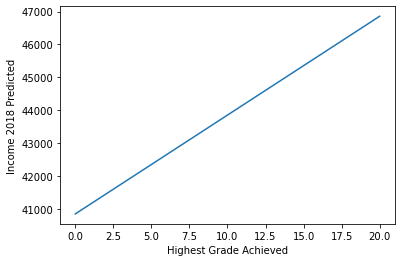

In [128]:
# fit an example linear model: use Highest Grade to predict Income 2018

# 1. fill in N/As in Highest Grade with Average Grade of all interviewees
x = np.asarray(data.loc[:, "Highest Grade"])
mean = np.mean(x)
x[x < 0] = mean

# 2. fit the linear model
x = np.reshape(x, (len(x), 1))
x = np.concatenate([np.ones(x.shape), x], axis=1) # add offset
w = np.linalg.solve(np.matmul(x.T, x), x.T@y)
print('w = ' + str(w))

# 3. plot the Grade - Income model
xfp = np.arange(np.min(x), np.max(x) + 0.1, 0.1)
vals = np.asarray([w[0] + w[1]*xfp[i] for i in range(len(xfp))])
vals[vals < 0] = 0 # attenuate negative predicted income to 0. Otherwise negative income does not make sense.
plt.plot(xfp, vals)
plt.ylabel("Income 2018 Predicted")
plt.xlabel("Highest Grade Achieved")
plt.show()

In [189]:
labels_real = [
    'Parent 1 Highest Grade',
#    'Self Esteem Score',
#    'AFQT Percentile Score',
#    'Average Drinks 2008',
    'Highest Grade',
#    'Fam Size 1979',
#    'Number Siblings',
    'Foreign Language']
#    'Library Card',
#    'Parent Cohabitation',
#    'First Marijuana Use']

for label in labels_real:
    x = np.asarray(data.loc[:, label])
    mean = np.mean(x)
    x[x < 0] = mean

In [163]:
labels_cat = [
    'Race',
    'Sex',
    'Type of Residence 1983']

for label in labels_categorical:
    x = np.asarray(data.loc[:, label])
    x[x < 0] = 0

In [164]:
cats_sets = [train_x.loc[:, label].fillna('NaN').unique() for label in labels_cat]

def onehot(column=None, col=None):
    column = column.astype(pd.CategoricalDtype(categories = col))
    one_hot = pd.get_dummies(column)      
    return np.asarray(one_hot)

d = np.zeros((len(train_x),1))
for i in range(len(labels_cat)):
  d = np.concatenate((d,onehot(train_x[labels_cat[i]],cats_sets[i])),axis=1)
print(d.shape,d)

l = np.zeros((len(valid_x),1))
for i in range(len(labels_cat)):
  l = np.concatenate((l,onehot(valid_x[labels_cat[i]],cats_sets[i])),axis=1)
print(l.shape,l)

s = np.zeros((len(test_x),1))
for i in range(len(labels_cat)):
  s = np.concatenate((s,onehot(test_x[labels_cat[i]],cats_sets[i])),axis=1)
print(s.shape,s)

(5256, 18) [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(657, 18) [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
(658, 18) [[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [190]:
train_labels = np.concatenate((train_x[labels_real], d[:,1:]),axis=1)
valid_labels = np.concatenate((valid_x[labels_real], l[:,1:]),axis=1)
test_labels = np.concatenate((test_x[labels_real], s[:,1:]),axis=1)

In [195]:
# Fit the linear model
def lin_model(train_x, y, test_x, length):
    X = np.column_stack([train_x, np.ones(length)])
    w = np.linalg.lstsq(X, y,rcond = None)[0]
    pred = np.matmul(test_x,w[:-1])
    return pred

# Return mean squared error
def MSE(y, pred):
    return (np.mean(np.power(np.subtract(y,pred),2)))

In [199]:
train_pred = lin_model(train_labels,train_y,train_labels,t)
print(MSE(train_y,train_pred))
valid_pred = lin_model(train_labels,train_y,valid_labels,t)
print(MSE(valid_y,valid_pred))
print((np.mean(np.abs(np.subtract(valid_y,valid_pred)))))

4403239443.740415
4670558209.736088
40175.51867070587
